
# Project: Investigate a Dataset -- No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, we will be investigating the No-show Appointments dataset. It contains a 100k recored of medical appointments in Brazil and is mainly focused around if the patient made it to the appointment or not. We will be looking into patterns of the no shows and other related attributes. 
<ol>
    <li><strong>PatientId:</strong> Identification number for each patient.</li>
<li><strong>AppointmentID:</strong> Identification number for each appointment made.</li>
<li><strong>Gender:</strong> Is the patient Male or Female.</li>
<li><strong>ScheduledDay:</strong> The day someone registered/called to make the appointment.</li>
<li><strong>AppointmentDay:</strong> The actual day the patient has to visit the doctor.</li>
<li><strong>Age:</strong> How old the patient is.</li>
<li><strong>Neighbourhood:</strong> The location of the hospital/clinic.</li>
<li><strong>Scholarship:</strong>whether or not the patient is enrolled in a Brasilian welfare program that provides financial aid. 0 or 1 for no or yes. [ref:](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) </li>
<li><strong>Hipertension:</strong> 0 or 1 for no or yes.</li>
<li><strong>Diabetes:</strong> 0 or 1 for no or yes.</li>
<li><strong>Handcap:</strong> 0 or 1 for no or yes.</li>
<li><strong>SMS_received:</strong> If messages were sent to the patient for a reminder. 0 or 1 for no or yes.</li>
<li><strong>No-show:</strong> Whether the patient made it to the appointment or not. Yes for no-show, No for showing up.</li>
</ol
>ref: [https://www.kaggle.com/datasets/joniarroba/noshowappointments/code]

### Question(s) for Analysis
> <ol>
<li> What is the age range of the patients who did not come to their appointments?</li>
<li>How is gender associated with showing up for an appointment?</li>
<li>Does being handcap affect attendance of appointments?</li>
<li>How many people received an SMS and did not show up to the appointments?</li>
<li>How many people had scholarships and failed to show up for their appointments?</li>
    </ol>



In [1]:
#Importing the packages that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in c:\users\ruth kibor\anaconda3\lib\site-packages (0.25.1)


<a id='wrangling'></a>
## Data Wrangling



### Loading Data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Assesing Data

In [4]:
#Looking at basic information concerning the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The data has 14 columns and 110,527 rows. There are no null rows in this dataset. 

In [5]:
#Looking at basic summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>There seems to be a problem with the minimum age (-1)

In [6]:
#Checking for unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#Checking for duplicates in the dataset
df.duplicated().sum()

0

In [8]:
#Renaming the columns
df.rename(columns={'No-show':'no_show'}, inplace= True)
df.rename(str.lower, axis= 'columns', inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> The dataset seems clean however, there are a few issues:
<ol> <li> The minimum age is -1.</li>
    <li> The appointment day and scheduled day are not in datetime format.</li>
    <li> There are 4 unique values in the handcap column instead of two.</li>
    </ol>


### Data Cleaning

 

In [9]:
#Age cannot be negative
i=df.query('age == -1').index #ref:https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
print(i)
df.drop(i, inplace=True)
df.info()

Int64Index([99832], dtype='int64')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110526 non-null float64
appointmentid     110526 non-null int64
gender            110526 non-null object
scheduledday      110526 non-null object
appointmentday    110526 non-null object
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


>There are now 110,526 rows.

In [10]:
#Changing the date format in appointmentday and scheduledday to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['scheduledday'] = df['scheduledday'].dt.date 
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['appointmentday'] = df['appointmentday'].dt.date
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [11]:
#Are there misscheduled appointments where the appointment date is before the scheduled date?
invalid_appointments = df[df['appointmentday'] < df['scheduledday']]
invalid_appointments

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [12]:
#Deleting invalid appointments
df.drop(invalid_appointments.index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110521 non-null float64
appointmentid     110521 non-null int64
gender            110521 non-null object
scheduledday      110521 non-null object
appointmentday    110521 non-null object
age               110521 non-null int64
neighbourhood     110521 non-null object
scholarship       110521 non-null int64
hipertension      110521 non-null int64
diabetes          110521 non-null int64
alcoholism        110521 non-null int64
handcap           110521 non-null int64
sms_received      110521 non-null int64
no_show           110521 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [13]:
#Dropping handcap values that are not 0 or 1
#ref: https://www.kaggle.com/code/hodatomoum/no-show-appointments-dataset-investigation-python
handcap_wrong = df[np.logical_and(df['handcap'] > 1, df['handcap'] <= 4)]
df.drop(handcap_wrong.index, inplace=True)
df.handcap.unique()

array([0, 1], dtype=int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110322 non-null float64
appointmentid     110322 non-null int64
gender            110322 non-null object
scheduledday      110322 non-null object
appointmentday    110322 non-null object
age               110322 non-null int64
neighbourhood     110322 non-null object
scholarship       110322 non-null int64
hipertension      110322 non-null int64
diabetes          110322 non-null int64
alcoholism        110322 non-null int64
handcap           110322 non-null int64
sms_received      110322 non-null int64
no_show           110322 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What is the age range of the patients who did not come to their appointments?

In [15]:
#creating a dataframe of only those who did not show up
yes_df=df[df['no_show']== "Yes"]
yes_df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [16]:
#No show age summary statistics
yes_df['age'].describe()

count    22273.000000
mean        34.279307
std         21.934180
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

Text(0, 0.5, 'Number of people')

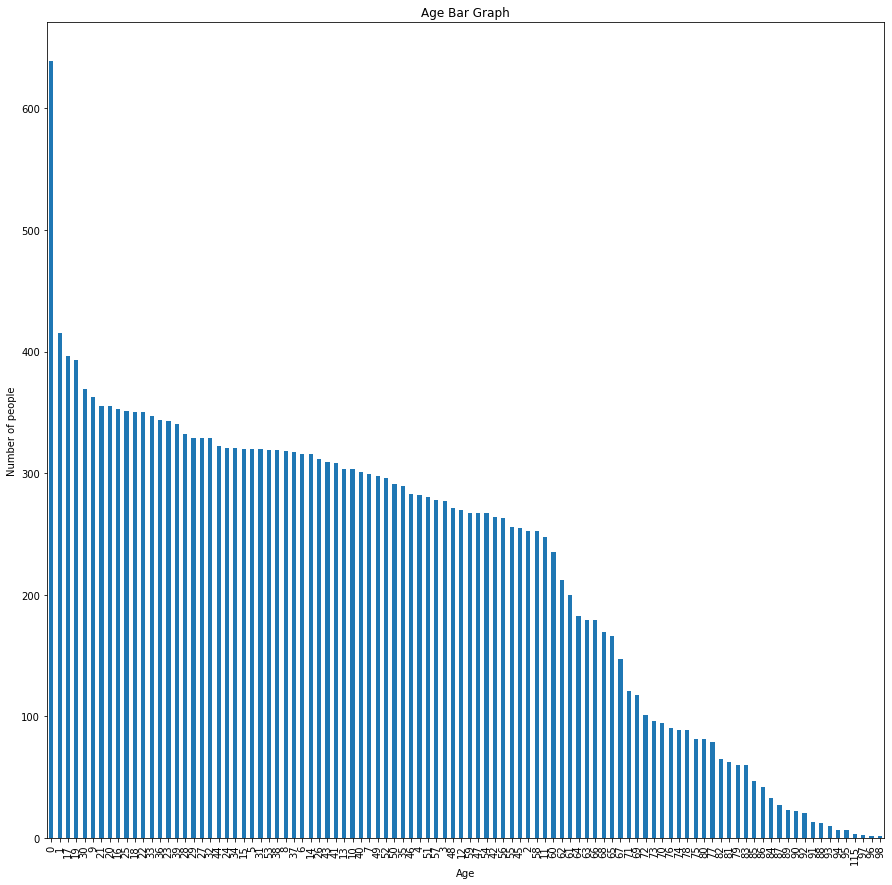

In [17]:
#Age distribution
yes_df['age'].value_counts().plot(kind='bar', figsize=(15,15));
plt.title('Age Bar Graph')
plt.xlabel('Age')
plt.ylabel('Number of people')

> This is a bit difficult to read, we can group the ages and then plot the graph again.

In [18]:
#groupping the ages using th percentiles found above
bin_edges = [0 ,16 ,33 ,51 ,115 ] 
#bin name
bin_names = [ '0-15','16-32' ,'33-50' ,'51-115' ]
#creating an age group column
yes_df['age_group']= pd.cut(df['age'], bin_edges, labels=bin_names)

C:\Users\Ruth Kibor\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Number of people')

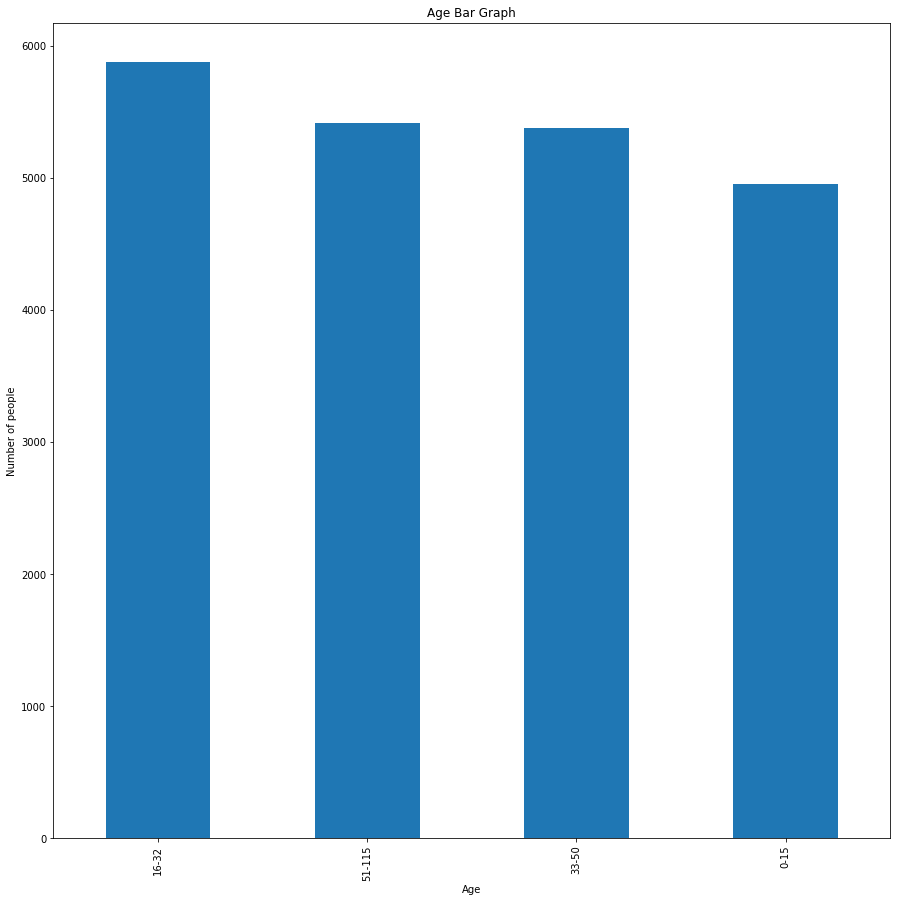

In [19]:
#Plotting age group
yes_df['age_group'].value_counts().plot(kind='bar', figsize=(15,15));
plt.title('Age Bar Graph')
plt.xlabel('Age')
plt.ylabel('Number of people')

> From this exploration of the age column in relation to the no_show column, we have the following:
<ol>
    <li>The mean age of those who didn't show up to appointments is 34 years. This is close to those who did show up to their appointments which is 37.</li>
    <li> From the Age Bar Graph, those who are between the ages of 16 and 32 have missed the most appointments.</li>
        </ol>

### Research Question 2 : Does being handcap affect attendance of appointments?

In [20]:
#Does having a handcap affect showing up for the appointment
handcaped=yes_df.groupby('handcap')['age'].count()
print(handcaped)


handcap
0    21909
1      364
Name: age, dtype: int64


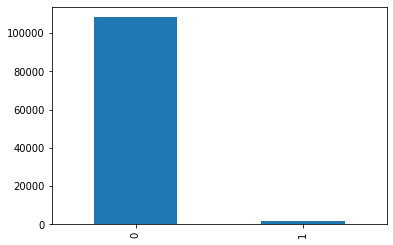

In [21]:
df['handcap'].value_counts().plot(kind='bar');


In [22]:
#percentage Handicap who didn't show
print(df.query('handcap== 0').count()['age']) #108282
print(df.query('handcap== 1').count()['age']) #2040

#from handcaped above we have 21909 and 364
hand_noshows = (364 / 2040) * 100
no_hand_noshows = (21909 / 108282) * 100

print(hand_noshows, no_hand_noshows)

108282
2040
17.84313725490196 20.233279769490775


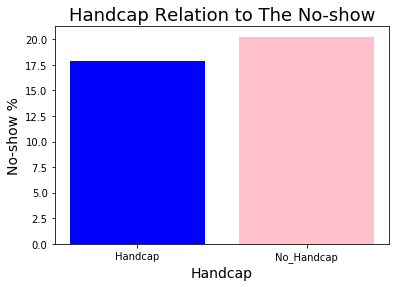

In [23]:
#Plotting the percentages
x = [1, 2]
labels = ['Handcap', 'No_Handcap']
heights = [hand_noshows, no_hand_noshows]
plt.bar(x, heights, tick_label=labels, color=['blue', 'pink'])
plt.title("Handcap Relation to The No-show", fontsize=18)
plt.xlabel("Handcap", fontsize=14)
plt.ylabel("No-show %", fontsize=14);

> From the analysis above, the percentage of handcap patients (17.84%)who didn't make their appointments is close to that of those who aren't handcapped(20.23%). There doesn't seem to be a significant correlation between being handcapped and not showing up for the appointment, however, more investigation can be done. 

### Research Question 3 : How many people received an SMS and did not show up to the appointments?

In [24]:
#Number of people who received an sms but didn't show up
sms_noshows=yes_df.groupby('sms_received')['age'].count()
print(sms_noshows)

sms_received
0    12498
1     9775
Name: age, dtype: int64


In [25]:
#percentage Handicap who didn't show
print(df.query('sms_received== 0').count()['age']) #75039
print(df.query('sms_received== 1').count()['age']) #35482

#from sms_noshows above we have 12498 and 9975
sms_noshows = (9775 / 35482) * 100
no_sms_noshows = (12498 / 75039) * 100

print(sms_noshows, no_sms_noshows)

74887
35435
27.549179865847474 16.655339223603725


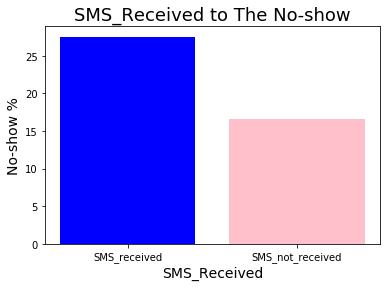

In [26]:
#Plotting
x = [1, 2]
labels = ['SMS_received', 'SMS_not_received']
heights = [sms_noshows, no_sms_noshows]
plt.bar(x, heights, tick_label=labels, color=['blue', 'pink'])
plt.title("SMS_Received to The No-show", fontsize=18)
plt.xlabel("SMS_Received", fontsize=14)
plt.ylabel("No-show %", fontsize=14);

> 27.55% of people who didn't receive an SMS didn't show up to their appointments while 16.66% didn't receive an SMS and didn't show up for their appointments.  

### Research Question 4: How is gender associated with showing up for an appointment?

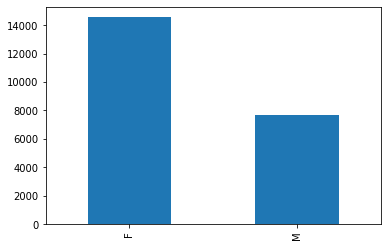

In [27]:
#Are more men likely to not show up for an appointment?
yes_df['gender'].value_counts().plot(kind='bar');

In [30]:
#A dataframe for only those who showed up to their appointments
no_df=df[df['no_show']== "No"]
no_df.head(20)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No
12,5.666548e+14,5634718,F,2016-04-28,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No


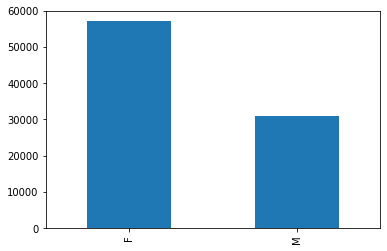

In [31]:
#What about those who showed up for their appointments?
no_df['gender'].value_counts().plot(kind='bar');

In [32]:
#It seems more females showed up and didn't show up to their appointments than men
#Lets look at the total population and see if there are more women than men
df['gender'].value_counts()

F    71727
M    38595
Name: gender, dtype: int64

gender  no_show
F       No         57162
        Yes        14565
M       No         30887
        Yes         7708
Name: age, dtype: int64
gender
F    71727
M    38595
Name: no_show, dtype: int64


Text(0, 0.5, 'Proportion')

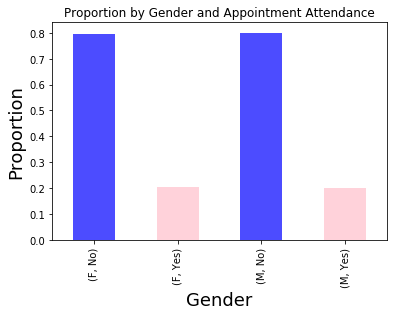

In [33]:
#To get a clearer picture of which gender missed their appointments 
#we can plot using percentages
counts=df.groupby(['gender', 'no_show'])['age'].count()
print(counts)
totals = df.groupby('gender')['no_show'].count()
print(totals)
colors=['blue','pink']
percentages = counts / totals
percentages.plot(kind='bar', title='Proportion by Gender and Appointment Attendance', color=colors, alpha=.7);
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Proportion', fontsize=18)

> More women register for appointments, but the percentage of no shows in both genders are almost the same

<a id='conclusions'></a>
## Conclusions

> Out of the total 110,522 appointment records provided in the dataset, and after some cleaning, 22273 did not show up for their appointments

> More women register for appointments, but the percentage of no shows in both genders are almost the same

>Increasing the number of SMS's sent may increase the number of patients who can attend their appointments. 

> Older people are more likely to show up for their appointments than younger people. 
>Having a scholarship doesn't really affect whether a patient will show up for their appointment or not. The age of the patients also doesn't have a significant effect on the attendance.
> The analysis, however, does not imply that one change causes another.  


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0